In [211]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from datetime import datetime

file = "insolito.json"
data = None
with open(file, 'r') as f:
    data = json.load(f)

channel_id, stats = data.popitem()
channel_stats = stats["channel_statistics"]
video_stats = stats["video_data"]


In [212]:
# channel statistics
print('views', channel_stats["viewCount"])
print('subscriber', channel_stats["subscriberCount"])
print('videos', channel_stats["videoCount"])

views 30022169
subscriber 201000
videos 143


In [213]:
# video statistics
sorted_vids = sorted(video_stats.items(), key=lambda item: int(item[1]["viewCount"]), reverse=True)
stats = []
for vid in sorted_vids:
    video_id = vid[0]
    title = vid[1]["title"]
    likes = int(vid[1]["likeCount"])
    views = int(vid[1]["viewCount"])
    comments = int(vid[1]["commentCount"])
    durCode = vid[1]["duration"]

    h = ' '.join(re.findall(r'(\d+)H', durCode))
    m = ' '.join(re.findall(r'(\d+)M', durCode))
    s = ' '.join(re.findall(r'(\d+)S', durCode))
    try:
        h = int(h)
    except ValueError:
        h = 0
    try:
        m = int(m)
    except ValueError:
        m = 0
    try:
        s = int(s)
    except ValueError:
        s = 0
        
    duration = 3600*h+60*m+s

    date_format = "%Y-%m-%d"
    date = vid[1]["publishedAt"]
    date = re.sub(r'T.+Z', '', date)
    date = datetime.strptime(date, date_format)
    today = datetime.today()
    days = today - date
    days = days.total_seconds()

    stats.append([title, days, duration, likes, comments, views])

In [214]:
df = pd.DataFrame(stats, columns=["title", "days", "duration", "likes", "comments", "views"])
df.head(10)

,title,days,duration,likes,comments,views
0,Das rätselhafte Verschwinden Lars Mittank - Di...,5.331607e+07,4365,30313,6105,1729425
1,Rebecca Reusch: Der mysteriöseste Fall Deutsch...,3.180247e+07,2165,24942,3936,997633
2,Der Snapchat Killer - Mädchen machen Foto von ...,2.385367e+07,1961,25742,1563,931509
3,Der rätselhafte Mord an Frauke Liebs | Doku 20...,6.420247e+07,2913,15128,2349,910286
4,Der Exorzismus von Anneliese Michel | Mini Dok...,8.355607e+07,886,23408,3744,895697
5,Tristan Brübach - Einer der mysteriösesten Fäl...,3.577687e+07,3739,18557,3085,686122
6,Das mysteriöse Verschwinden von Maura Murray |...,8.234647e+07,1503,13561,1011,618230
7,Wer hat die 9-jährige Peggy Knobloch ermordet?...,1.892887e+07,4241,14489,2025,567542
8,Das mysteriöse Verschwinden von Kris Kremers u...,8.597527e+07,632,9248,1497,518137
9,Matej Peris: Videoaufnahmen zeigen seine letzt...,6.487266e+06,1117,14376,1906,471986


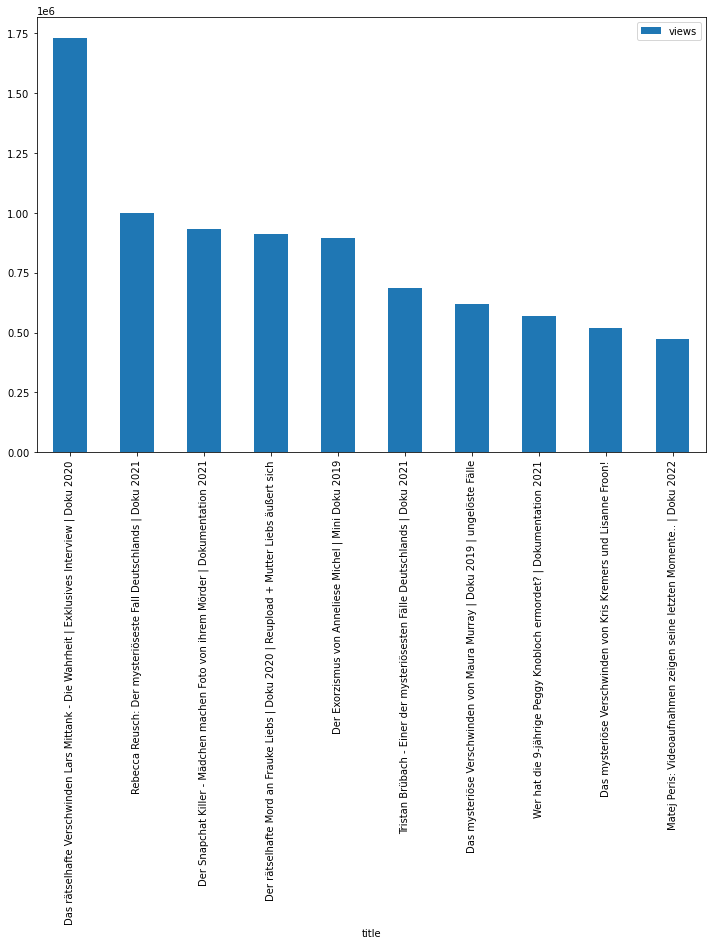

In [215]:
top10 = df.head(10)
ax = top10.plot.bar(x="title", y="views", figsize=(12,8))

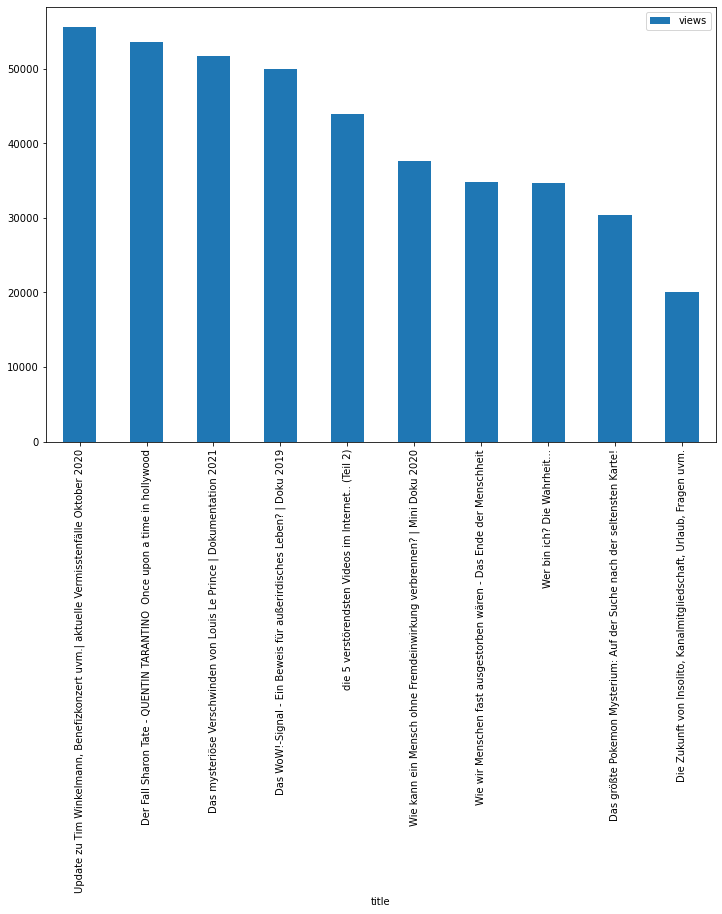

In [216]:
bottom10 = df.tail(10)
ax = bottom10.plot.bar(x="title", y="views", figsize=(12,8))

In [217]:
# likes / comments
likes_avg = top10['likes'].mean()
comments_avg = top10['comments'].mean()
print('Top 10')
print('average likes', likes_avg)
print('average comments', comments_avg)

likes_avg = bottom10['likes'].mean()
comments_avg = bottom10['comments'].mean()
print('Bottom 10')
print('average likes', likes_avg)
print('average comments', comments_avg)

Top 10
average likes 18976.4
average comments 2722.1
Bottom 10
average likes 2024.4
average comments 279.8


In [218]:
# Importing the dataset
dataset = df
X = dataset.iloc[:, 1].values
y = dataset.iloc[:, -1].values
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)


In [219]:

# Training the Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [220]:

# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

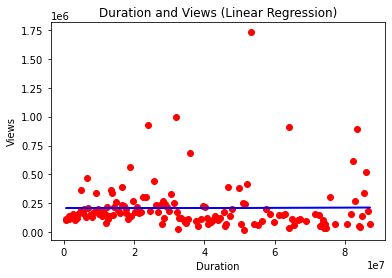

In [221]:

# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Duration and Views (Linear Regression)')
plt.xlabel('Duration')
plt.ylabel('Views')
plt.show()


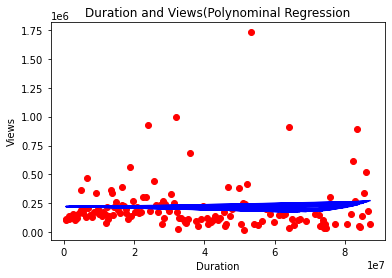

In [222]:

# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Duration and Views(Polynominal Regression')
plt.xlabel('Duration')
plt.ylabel('Views')
plt.show()


KeyboardInterrupt: 

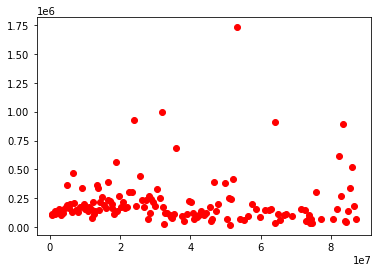

In [223]:

# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Duration and Views(Polynominal Regression')
plt.xlabel('Duration')
plt.ylabel('Views')
plt.show()

# Predicting a new result with Linear Regression
lin_reg.predict([[3500]])

# Predicting a new result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform([[3500]]))